In [1]:
# Visualizing Seattle Bicycle Counts 
from datetime import datetime 
from dateutil import parser 
import numpy as np 
import pandas as pd 

In [2]:
# url = ('https://raw.githubusercontent.com/jakevdp/'
#'bicycle-data/main/FremontBridge.csv')
# !curl -O {url}

In [5]:
path = "/__PROJECTS/aa_CommonData/ml/"
data = pd.read_csv(path+"FremontBridge.csv", index_col="Date", parse_dates=True)
data.head()

/tmp/ipykernel_414462/3298667745.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(path+"FremontBridge.csv", index_col="Date", parse_dates=True)


,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


In [6]:
# укоротим имена ячеек (важно)
data.columns = ["Total","East","West"]

In [7]:
# удалим нули и выведем общую сводку
data.dropna().describe()

,Total,East,West
count,98552.000000,98552.000000,98552.000000
mean,106.024667,45.973973,60.050694
std,132.548694,60.519212,81.957561
min,0.000000,0.000000,0.000000
25%,13.000000,5.000000,7.000000
50%,59.000000,26.000000,32.000000
75%,144.000000,63.000000,79.000000
max,1097.000000,667.000000,850.000000


/tmp/ipykernel_414462/874716172.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


Text(0, 0.5, 'Hourly Bicycle Count')

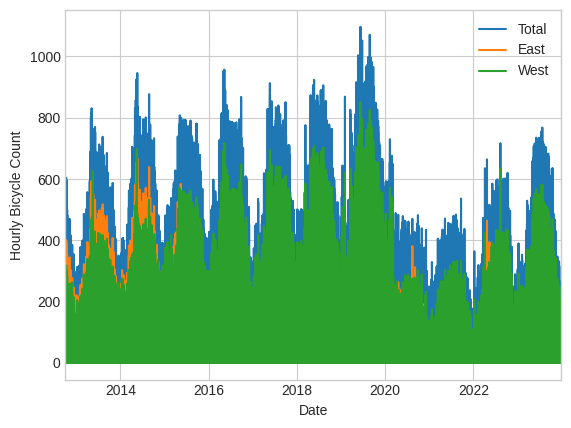

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.style.use("seaborn-whitegrid")

data.plot()

plt.ylabel("Hourly Bicycle Count")

Text(0, 0.5, 'Weekly bicycle count')

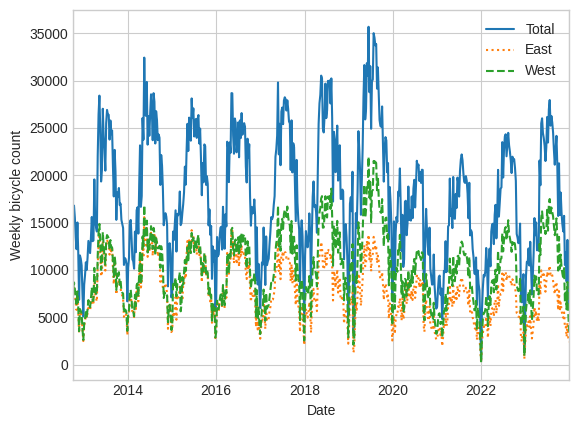

In [10]:
# произведем семплирование на базе недели (уплотним данные)
weekly = data.resample("W").sum()
weekly.plot(style=["-",":","--"])
plt.ylabel("Weekly bicycle count")


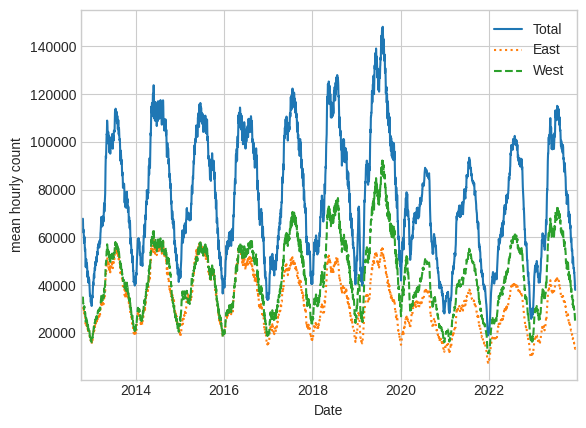

In [12]:
# используем скользящее среднее
daily = data.resample("D").sum()
daily.rolling(30, center=True).sum().plot(style=["-",":","--"])
plt.ylabel("mean hourly count");

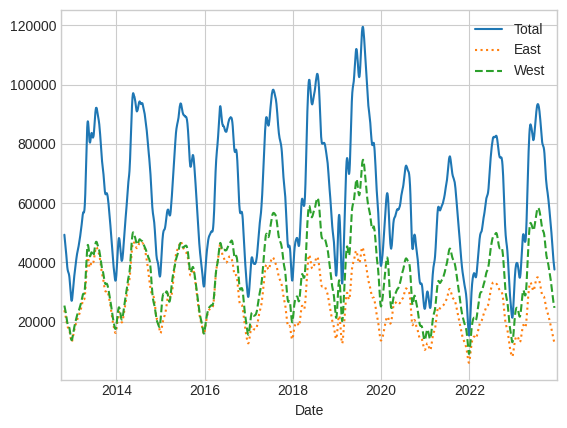

In [14]:
# можно смягчить дерганность графика использую gaussian window
daily.rolling(50, center=True, win_type="gaussian").sum(std=10).plot(style=[
    "-",":","--"
]);

               Total        East        West
00:00:00   10.273746    4.522650    5.751096
01:00:00    5.489528    2.481734    3.007793
02:00:00    3.619780    1.604151    2.015629
03:00:00    2.619338    1.224793    1.394545
04:00:00    6.169021    2.775938    3.393083
05:00:00   22.809303   11.006089   11.803215
06:00:00   78.582806   37.411593   41.171213
07:00:00  194.505602   92.598393  101.907209
08:00:00  276.289089  126.631028  149.658061
09:00:00  169.034348   73.817052   95.217296
10:00:00   99.460171   44.361998   55.098173
11:00:00   93.793717   43.422796   50.370921
12:00:00  101.427667   47.039698   54.387969
13:00:00  107.900657   50.207451   57.693207
14:00:00  118.414557   53.581548   64.833009
15:00:00  147.811831   64.879260   82.932571
16:00:00  226.524830   88.897517  137.627313
17:00:00  348.903359  130.932814  217.970545
18:00:00  238.824976   98.608569  140.216407
19:00:00  123.692064   52.697663   70.994401
20:00:00   72.098588   31.905307   40.193281
21:00:00  

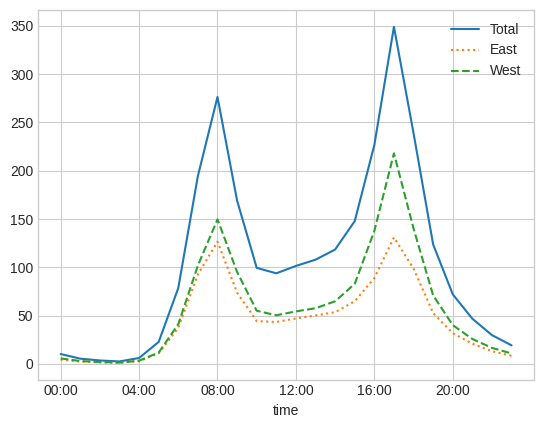

In [17]:
# строим график на периоде дня 
# получаем временное среднее 
# после этого выбираем тики - на которых будем выводиться 
# и выводимся на этих тиках 

by_time = data.groupby(data.index.time).mean()
print(by_time)
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=["-",":","--"]);

<Axes: >

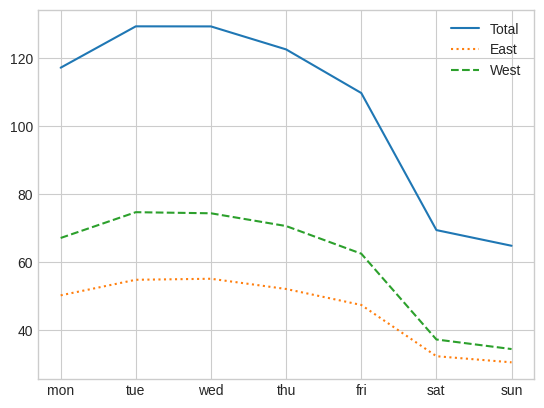

In [18]:
# повторим логику но уже на базе дня недели 
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ["mon","tue","wed","thu","fri","sat","sun"]
by_weekday.plot(style=["-",":","--"])

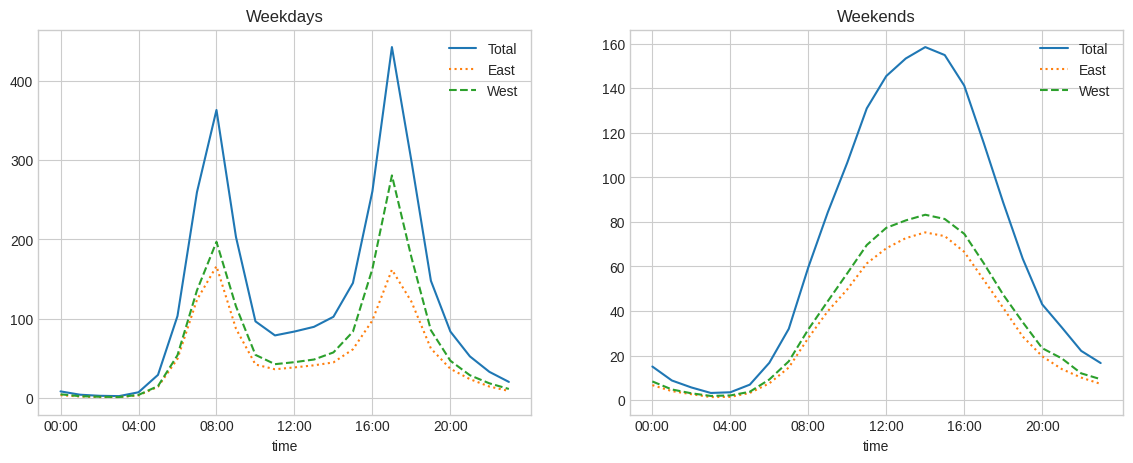

In [27]:
# выведем тренды совместно 
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2, figsize=(14,5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
    xticks=hourly_ticks, style=['-', ':', '--'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
    xticks=hourly_ticks, style=['-', ':', '--']);